In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Fertilizer Prediction.csv')

In [5]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [6]:
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [7]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [8]:
df.isnull().value_counts()

Temparature  Humidity   Moisture  Soil Type  Crop Type  Nitrogen  Potassium  Phosphorous  Fertilizer Name
False        False      False     False      False      False     False      False        False              99
dtype: int64

In [9]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

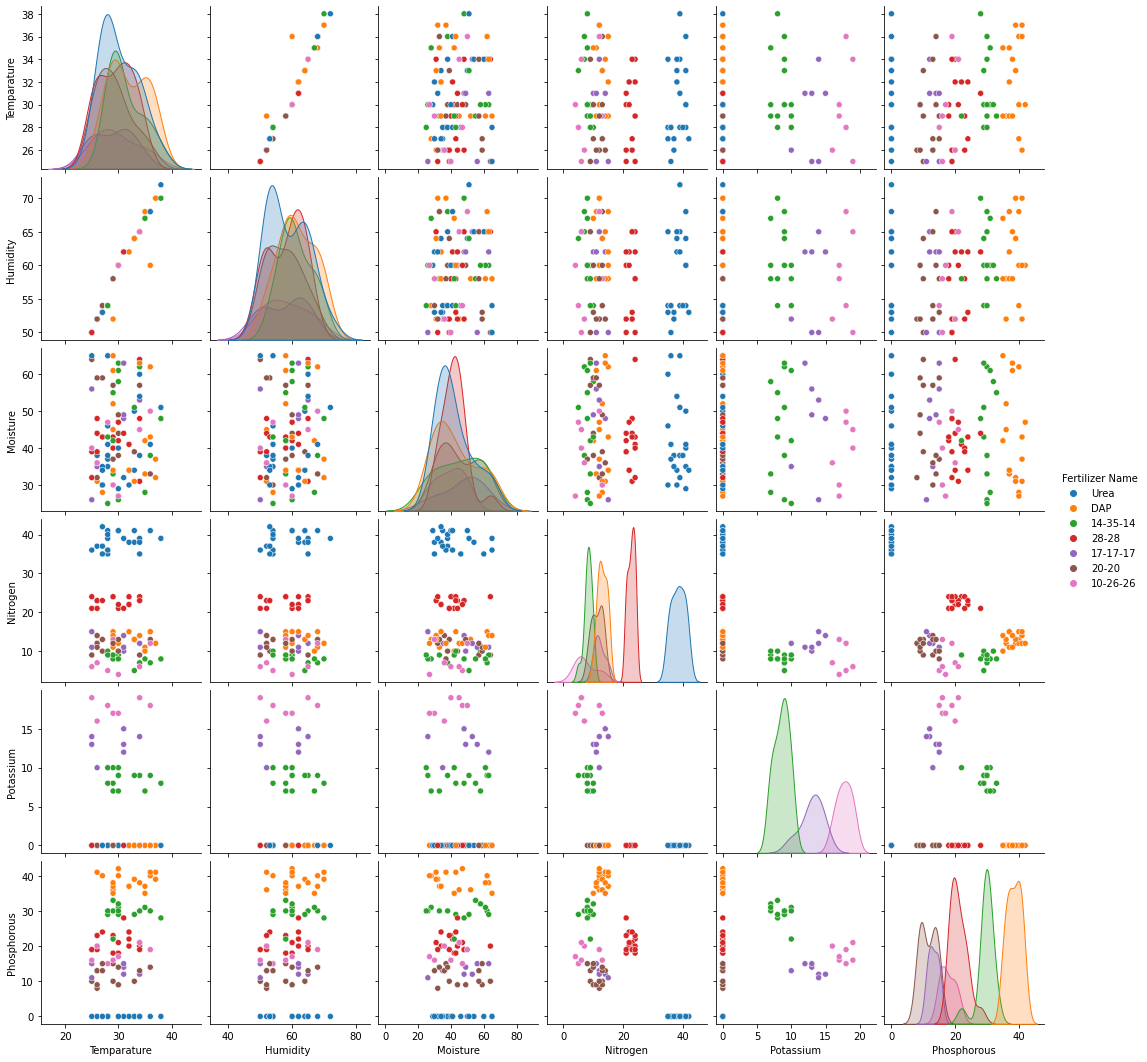

In [10]:
sns.pairplot(df,hue='Fertilizer Name')

<AxesSubplot:>

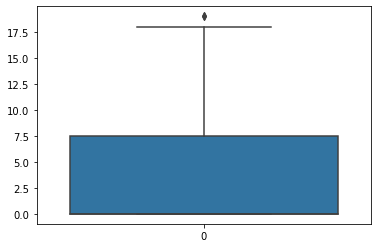

In [11]:
sns.boxplot(data=df['Potassium'])

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
def Encoder(df):
          col=df['Fertilizer Name']
          le = LabelEncoder()
          for feature in col:
              try:
                  df['Fertilizer Name'] = le.fit_transform(df['Fertilizer Name'])
              except:
                  print('Error encoding '+feature)
          return df

In [14]:
Encoder(df)
df['Fertilizer Name'].unique()

array([6, 5, 1, 4, 2, 3, 0])

In [15]:
df['Fertilizer Name']=df['Fertilizer Name']
df['Fertilizer Name']
df1=df[['Temparature', 'Humidity ', 'Moisture','Nitrogen', 'Potassium', 'Phosphorous','Fertilizer Name']]

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df1.drop('Fertilizer Name',axis=1))
scaled=sc.transform(df1.drop('Fertilizer Name',axis=1))
df1=df1.drop(['Fertilizer Name'],axis=1)

In [17]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(scaled,df['Fertilizer Name'], test_size=0.2, random_state=42)

In [21]:
x_train.shape

(79, 6)

In [22]:
x_test.shape

(20, 6)

In [23]:
y_train

49    1
70    4
68    0
15    2
39    5
     ..
60    6
71    6
14    5
92    6
51    3
Name: Fertilizer Name, Length: 79, dtype: int64

In [24]:
y_test

62    4
40    3
95    0
18    6
97    5
84    4
64    6
42    4
10    5
0     6
31    5
76    4
47    4
26    1
44    5
4     6
22    5
12    6
88    0
73    6
Name: Fertilizer Name, dtype: int64

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr=LogisticRegression()

In [27]:
lr.fit(x_train,y_train)

LogisticRegression()

In [28]:
y_test

62    4
40    3
95    0
18    6
97    5
84    4
64    6
42    4
10    5
0     6
31    5
76    4
47    4
26    1
44    5
4     6
22    5
12    6
88    0
73    6
Name: Fertilizer Name, dtype: int64

In [29]:
pred=lr.predict(x_test)

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



### KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn=KNeighborsClassifier(n_neighbors=1)

In [34]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [35]:
predk=knn.predict(x_test)

In [36]:
predk

array([4, 3, 0, 6, 5, 4, 6, 4, 5, 6, 5, 4, 4, 1, 5, 6, 5, 3, 0, 6])

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test,predk))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      0.83      0.91         6

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.93        20
weighted avg       0.97      0.95      0.96        20



In [39]:
knn2=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
predk=knn.predict(x_test)

In [40]:
print(classification_report(y_test,predk))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      0.83      0.91         6

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.93        20
weighted avg       0.97      0.95      0.96        20

